## Practica 1 
## Miguel Alfonso Zapata De La Cruz 

<img src= 'Practica_1.jpg' width="600px">

In [1]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.stats import norm 

## Exercise 1: Generate Distances 
### Note, we use $\Omega_{i,0}$ as O_i in ours code

In [2]:
# The matter and Lambada density parameters are 
O_m=0.3
O_L=0.7
# and we consider the value of the Hubble parameter today  and the speed of the light to be
H_0=70.0
c = 300000

### Remember that the Friedmann equation in function of the redshift is 
$$
H^2 (z) = H^2_{0} \left( \Omega_{r,0}(z+1)^4 + \Omega_{m,0} (z+1)^3 + \Omega_{k,0} (z+1)^2 + \Omega_{\Lambda , 0}  \right)
$$

in this cosmology with $ \Omega_{r,0} = \Omega_{k,0} = 0 $

### we can se that Friedmann equation $\Omega_{m} \thicksim a^{-3} $, $\Omega_{r} \thicksim a^{-4}, \; \Omega_{k} \thicksim a^{-2} \; and  \; \Omega_{\Lambda} \thicksim a^{0}$, since $\Omega_{i} = \frac{\rho_i}{\rho_c}$, whith $i =  \Lambda, \; k , \; m, \;r$ and $\rho_c$ the critical energy density.  

In [3]:
# The Hubble parameter for this cosmology is 

def H(z):
  return np.sqrt((O_m)*(z+1)**3 + O_L)**(-0.5)

# where 
z=np.arange(0,3,0.05)

## in other hand, the comoving distance is defined as $ \chi (z) =  c \int_{0}^{x} \frac{dz'}{H(z')}$

In [4]:
from scipy.integrate import quad
def chi(z):
  return (c/H_0 )*(quad(H, 0, z)[0])

## the angular and luminosity distance are 
$$
D_A = \frac{\chi(z)}{1+z}  
$$ 

$$ 
D_L = (1+z) \chi (z)
$$


In [5]:
def D_l(z):
  return (z+1)*chi(z)

def D_a(z):
  return chi(z)/(1+z)


Text(0, 0.5, 'Distance ($Gpc/h$)')

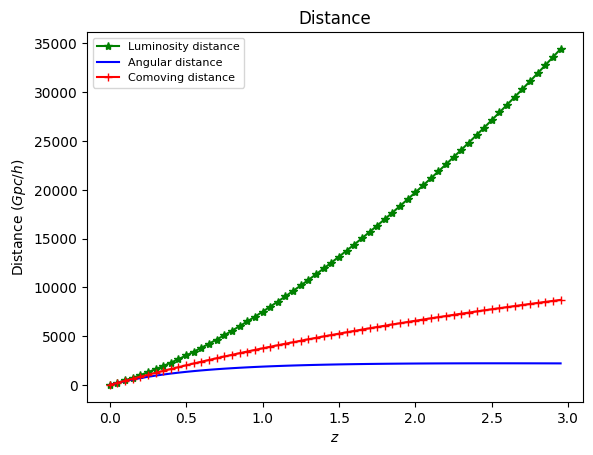

In [6]:
# The plot with the 3 distances, expressed in Gpc/h up to a redshift of 3 is 

chi = np.vectorize(chi)
mpl.plot(z,D_l(z),marker="*",color='green', label='Luminosity distance',)
mpl.plot(z,D_a(z), color='blue', label='Angular distance',)
mpl.plot(z,chi(z), marker="+",color='red', label='Comoving distance',)
mpl.legend(fontsize=8)
mpl.title('Distance')
mpl.xlabel('$z$')
mpl.ylabel('Distance ($Gpc/h$)')

## Exercise 2: Density evolution

In [7]:
# Now we introduce the new value of the density parameters
O_m2 =0.2999
O_L2= 0.7
O_r= 0.0001

# 1) In the first case, we analyze the matter and vacum iquality era, is say $\Omega_{m} = \Omega_{\Lambda} $, with the redshift from $z = 0$ to $z = 1000$. For this case we have 

$$ 
     \Omega_{m} = \Omega_{\Lambda} \rightarrow \frac{\rho_{m,0}}{\rho_c a_{eq}^3} = \frac{\rho_{\Lambda,0}}{\rho_{c}} \rightarrow a_{eq} = \left( \frac{\ \rho_{m,0}}{\rho_{\Lambda,0}}\right)^{1/3} = \left( \frac{\ \Omega_{m,0}}{\Omega_{\Lambda,0}}\right)^{1/3}  
 
$$

In [8]:
c = 1/3 
a_eq1 = (O_m2 / O_L2)**c 
print("El valor de a en la era de igualdad materia-vacio es", a_eq1)

El valor de a en la era de igualdad materia-vacio es 0.7538636598815334


### remember that the redshift is given by $a = \frac{1}{1+z}$ 

In [9]:
## thus, the redshift at the matter-vacum equality era is 

z_eq1 = 1/a_eq1-1
print("The value of the redshift in this case is ", z_eq1) 

The value of the redshift in this case is  0.32649980787924693


### doing the same process for the other case we obtain 


In [10]:
## Radiation-matter equality era 

a_eq2 = O_r/O_m2 
print("The matter-radiation equality value of a is ", a_eq2)

## and the redshift value is
z_eq2 = 1/a_eq2 -1
print("The value of the redshift in this case is ", z_eq2) 
 

The matter-radiation equality value of a is  0.0003334444814938313
The value of the redshift in this case is  2997.9999999999995


### now, we can to calculate the factor of the equivalence $z_{eq}^{\Lambda,m} / a_{eq}^{\Lambda,m} $ and $z_{eq}^{r,m} / a_{eq}^{r,m} $ 

In [11]:
f_1 = z_eq1/a_eq1 
f_2 = z_eq2/a_eq2 
print(f_1,  f_2)

0.4331019324244321 8991001.999999998


### Now, we need the Friedmann equations for each era. Note that for the matter domination era ($\Omega_{k,0} = \Omega_{r,0} = \Omega_{\Lambda,0} = 0$), we obtain the equation 

$$

H^2 = H_{0}^2 ( \Omega_{m,0}(1+z)^3) = H_{0}^2 ( \Omega_{m,0} a^{-3} )
$$

### and for radiation and vacum era 

$$
H^2 = H_{0}^2 ( \Omega_{r,0} a^{-4} ) 
$$
$$
H^2 = H_{0}^2 ( \Omega_{\Lambda,0} )
$$


### with $H = \frac{\dot{a}}{a}$, we obtain 

$$
\dot{a} = \frac{da}{dt} = H_{0} \sqrt{\Omega_{m,0} } a^{-1/2} \rightarrow \int_{0}^{a} \sqrt{a'} da' = H_0 \sqrt{\Omega_{m,0}} \int_{0}^{t} dt'\rightarrow a_m^{3/2} = \frac{2}{3} H_0 \sqrt{\Omega_{m,0}} t 
$$

### in the same way, we obtain for radiation and vacum era 


$$ 

a \dot{a_{r}}   = H_0 \sqrt{\Omega_{r,0}} \rightarrow \frac{a^2_{r}}{2} = H_{0} \sqrt{\Omega_{r,0} } t  \rightarrow a_{r} = \sqrt{2 H_0 t \sqrt{\Omega_{r,0}}}


$$


$$

\frac{\dot{a}}{a} = H_0 \sqrt{\Omega_{\Lambda,0}} \rightarrow \ln(a) = H_0 \sqrt{\Omega_{\Lambda,0}} t \rightarrow a_{\Lambda} = \exp{ \left(H_0 \sqrt{\Omega_{\Lambda,0}} t \right)}
$$

### the evolution of the scale factor in each era is 
$$ 
1)\; a_m = \left(\frac{2}{3} H_0 \sqrt{\Omega_{m,0}} t \right)^{3/2}, 
$$ 
$$ 
2) \; a_{r} = \sqrt{2 H_0 t \sqrt{\Omega_{r,0}}}, 
$$ 
$$ 
3) \; a_{\Lambda} = \exp{ \left(H_0 \sqrt{\Omega_{\Lambda,0}} t \right)}
$$


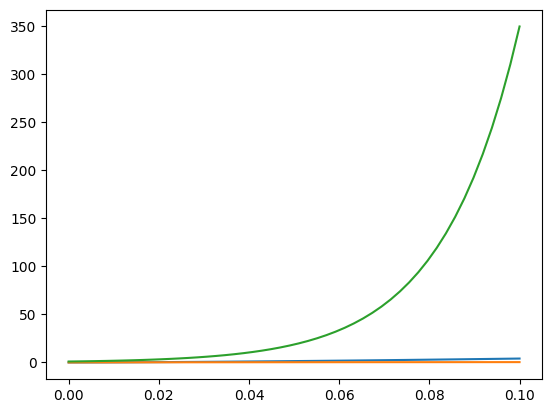

In [12]:
t = np.linspace(0,0.1)
k = 0.666666
p =1.5
s = 0.5
a_m = (k*t*H_0*(O_m2)**s)**p  
a_r = (2*H_0*t*(O_r)**s)**s
a_L = np.exp(H_0*t*(O_L2)**s)

mpl.plot(t, a_m)
mpl.plot(t, a_r)
mpl.plot(t, a_L)

### Now, we calculate the evolution of the matter density, for this, note that there are 3 intervals, $[0, \Omega_{r}]$, $[\Omega_{r} = \Omega_{m},\Omega_{m} = \Omega_{\Lambda} ]$,  $[\Omega_{\Lambda},0]$.
### Remember that que matter density evolution is 
$$
\rho_{m} = \rho_{m,0} a^{-3}
$$
### from de equation $2)$, in the radiation domination era, we get

$$
    \rho_{m,r} = \rho_{m,0} \left( 2 H_0 t \sqrt{\Omega_{r,0}}\right)^{-3/2} 
$$
### in the same way, for the matter domination era and using the expression $1)$ 

$$
\rho_{m} = \rho_{m,0}  a^{-3} = \rho_{m,0} \left(\frac{2}{3} H_0 \sqrt{\Omega_{m,0}} t \right)^{-2}
$$



### and finally, for the  $\Lambda$ era, the matter density is 
$$
\rho_{m,\Lambda} = \rho_{m,0} a^{-3} = \rho_{m,0} \exp{ \left(-3 H_0 \sqrt{\Omega_{\Lambda,0}} t \right)}
$$



### now with $\rho_c =\frac{3 H^2}{8 \pi G} $ and $\Omega_i = \frac{\rho_i}{\rho_c} \rightarrow \Omega_{i} \frac{3 H^2}{8 \pi G} = \rho_{i} $, thus for today $\Omega_{i}(t=0) = \Omega_{i,0} $ and $H(t=0) = H_{0}$. The evolution of the $\rho_{m}$ of the era of domination of the 3 components





$$
4) \; \rho_{m,r}  = \frac{ 3 \Omega_{m,0}  H_0^2}{8 \pi   G  } \left( 2 H_0 t \sqrt{\Omega_{r,0}}\right)^{-3/2} \\
5) \; \rho_{m} = \frac{ 3 \Omega_{m,0}  H_0^2}{8 \pi   G  }\left(\frac{2}{3} H_0 \sqrt{\Omega_{m,0}} t \right)^{-2} \\
6) \; \rho_{m,\Lambda} = \frac{ 3 \Omega_{m,0}  H_0^2}{8 \pi   G  } \exp{ \left(-3 H_0 \sqrt{\Omega_{\Lambda,0}} t \right)}
$$

### the definition of the look-back time is 
$$
t_0 -t = \int_{0}^{z} \frac{dz'}{(1+z')H(z')}
$$

### where $t$ emmited and $t_0$ received. Note that 

$$
t_0 -t = \int_{0}^{z} \frac{dz'}{(1+z')H(z')} = \frac{1}{H_0}\int_{(z+1)^{-1}}^{1} \frac{x dx }{\sqrt{\Omega_{m,0} x + \Omega_{r,0} + \Omega_{\Lambda,0} x^4 + \Omega_{k,0} x^2}}
$$

### for the first $a_{eq}^{m,r}$, we have $\Omega_{r} = \Omega_{m}$, so $\Omega_{\Lambda} = \Omega_{k} = 0$, and with $t=0$ for the matter-radiation equality era, the look-back time is 

$$

t_0^{m,r} = \frac{1}{H_0} \int_{(z_{eq}^{m.r} + 1)^{-1}}^{1}  \frac{x dx }{\sqrt{\Omega_{m,0} x + \Omega_{r,0}}} 

$$

In [13]:
from sympy.solvers import solve 
from scipy import integrate 
half = 0.5 
h = 979.6825
def t_1(x):
    t_11 = x/(H_0*(x*O_m2 + O_r)**half)
    return t_11 
z1 = 1/(1+z_eq1)
int1 = integrate.quad(t_1,z1,1)
t1 = h*float(int1[0])
t1


5.884601231079159

### and for the $a_{eq}^{m,r}$, we have $\Omega_{m} = \Omega_{\Lambda}$, so $\Omega_{r} = \Omega_{k} = 0$, and with $t=0$ for the matter-$\Lambda$ equality era, the look-back time is 

$$

t_0^{m,\Lambda} = \frac{1}{H_0} \int_{(z_{eq}^{m,\Lambda} + 1)^{-1}}^{1}  \frac{x dx }{\sqrt{\Omega_{m,0} x + \Omega_{\Lambda,0}x^4}} 


$$

In [18]:
def t_2(x): 
    t_22 = x/(H_0*(x*O_m2 + (O_L2)*x**4)**half)
    return t_22 

z2 = 1/(1+z_eq2)
int2 = integrate.quad(t_2,z2,1)
t2 = h*float(int2[0])
t2





13.494470051222088

In [21]:
def t_tot(x):
    t_tott = x/(H_0*(x*(O_m2)+(O_L2)*(x**4) + O_r ))
    return t_tott 

z_t = 1000
z_f = 1/(1+z_t)
int_t = integrate.quad(t_tot,z_f,1)
ti_tot = h * float(int_t[0])
ti_tot

33.76558039535702

In [15]:
def rho_m(t):
    rho_1 = ((O_m2*3*H_0**2)/(8*3.1415))*(2*H_0*t*(O_r)**half)**(-3/2)
    rho_2 = ((O_m2*3*H_0**2)/(8*3.1415))*((2/3)*H_0*t*(O_m2)**half)**(-2)
    rho_3 = ((O_m2*3*H_0**2)/(8*3.1415))*(np.exp(-3 * H_0 *t* (O_L2)**half))
    return rho_1*(t<t1) + rho_2*((t<=t2)&(t>=t1)) + rho_3*(t>t2)
    
    

Text(0.5, 1.0, 'Evolution of the matter density ')

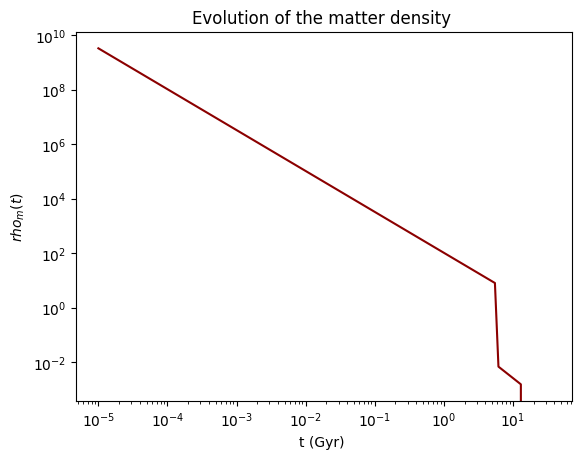

In [28]:
t=np.linspace(0.00001,ti_tot)
mpl.plot(t,rho_m(t),color='darkred')
mpl.xscale('log')
mpl.yscale('log')
mpl.xlabel('t (Gyr) ')
mpl.ylabel('$rho_m (t)$')
mpl.title('Evolution of the matter density ')